In [1]:
#Bashayer Al-Ahmadi_Cohort Two_Black Belt Exam 1
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from ActMng import AccountManager
yf.pdr_override()
import warnings
warnings.filterwarnings('ignore')
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
#Use Python’s Yfinance Package to import the last ten
#(10) years of daily price data (the Open and the Close
#Prices for each day) for at least five (5) stocks of your
#choice. BE SURE THE STOCKS YOU CHOOSE HAVE
#THIS DATA AVAILABLE FOR ALL OF THE NORMAL
#TRADING DAYS IN THE LAST TEN (10) YEARS!

# First Stock 
df_AAPL = pdr.get_data_yahoo('AAPL', '2010-01-01', '2020-01-01') 
df_AAPL = df_AAPL[['Open', 'Close']] 
df_AAPL = df_AAPL.rename(columns = {'Open': 'Open_AAPL', 'Close': 'Close_AAPL'}) 
# seconed Stock 
df_MSFT = pdr.get_data_yahoo('MSFT', '2010-01-01', '2020-01-01') 
df_MSFT = df_MSFT[['Open', 'Close']]
df_MSFT = df_MSFT.rename(columns = {'Open': 'Open_MSFT', 'Close': 'Close_MSFT'})
# third Stock
df_GOOG = pdr.get_data_yahoo('GOOG', '2010-01-01', '2020-01-01') 
df_GOOG = df_GOOG[['Open', 'Close']]
df_GOOG = df_GOOG.rename(columns = {'Open': 'Open_GOOG', 'Close': 'Close_GOOG'})
# Fourth Stock
df_AMZN=  pdr.get_data_yahoo('AMZN', '2010-01-01', '2020-01-01') 
df_AMZN = df_AMZN[['Open', 'Close']]
df_AMZN = df_AMZN.rename(columns = {'Open': 'Open_AMZN', 'Close': 'Close_AMZN'})
# Fifth Stock (Change the name)
df_NVDA=  pdr.get_data_yahoo('NVDA', '2010-01-01', '2020-01-01') 
df_NVDA = df_NVDA[['Open', 'Close']]
df_NVDA = df_NVDA.rename(columns = {'Open': 'Open_NVDA', 'Close': 'Close_NVDA'})

#Join the individual tables containing the price data for the individual stocks into a single data table indexed by date.
df = df_AAPL.merge(df_MSFT, on = 'Date') 
df = df.merge(df_GOOG,  on = 'Date')
df = df.merge(df_AMZN,  on = 'Date')
df = df.merge(df_NVDA,  on = 'Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_AAPL,Close_AAPL,Open_MSFT,Close_MSFT,Open_GOOG,Close_GOOG,Open_AMZN,Close_AMZN,Open_NVDA,Close_NVDA
Date,,,,,,,,,,
2009-12-31,7.611786,7.526071,30.980000,30.480000,311.208527,308.832428,137.089996,134.520004,4.677500,4.670000
2010-01-04,7.622500,7.643214,30.620001,30.950001,312.304413,312.204773,136.250000,133.899994,4.627500,4.622500
2010-01-05,7.664286,7.656429,30.850000,30.959999,312.418976,310.829926,133.429993,134.690002,4.605000,4.690000
2010-01-06,7.656429,7.534643,30.879999,30.770000,311.761444,302.994293,134.600006,132.250000,4.687500,4.720000
2010-01-07,7.562500,7.520714,30.629999,30.450001,303.562164,295.940735,132.009995,130.000000,4.695000,4.627500
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,71.172501,71.067497,157.479996,157.380005,1348.500000,1343.560059,1793.810059,1789.209961,59.549999,59.654999
2019-12-26,71.205002,72.477501,157.559998,158.669998,1346.170044,1360.400024,1801.010010,1868.770020,59.689999,59.797501
2019-12-27,72.779999,72.449997,159.449997,158.960007,1362.989990,1351.890015,1882.920044,1869.800049,59.950001,59.217499


In [3]:
#Slice off the first three (3) years of daily price data. Retain the Close Prices and convert them into daily return values. Drop any NaN’s as needed.
#YOU MAY NEED TO CONVERT THIS DATAFRAME INTO A MATRIX AND THEN TRANSPOSE IT IN ORDER TO RUN ALL OFYOUR CODE. 
#BE SURE TO KEEP THE OTHER SEVEN (7) YEARS OF DAILY PRICE DATA AROUND FOR LATER USE!

three_years = df.loc['2010-01-01': '2013-01-01']
three_years = three_years[['Close_AAPL', 'Close_MSFT','Close_GOOG','Close_AMZN','Close_NVDA']] 
three_years['Return_AAPL'] = three_years['Close_AAPL'].pct_change() 
three_years['Return_MSFT'] = three_years['Close_MSFT'].pct_change()
three_years['Return_GOOG'] = three_years['Close_GOOG'].pct_change()
three_years['Return_AMZN'] = three_years['Close_AMZN'].pct_change()
three_years['Return_NVDA'] = three_years['Close_NVDA'].pct_change()
three_years = three_years[['Return_AAPL', 'Return_MSFT','Return_GOOG' ,'Return_AMZN' , 'Return_NVDA' ]]  
three_years = three_years.dropna() 
three_years


,Return_AAPL,Return_MSFT,Return_GOOG,Return_AMZN,Return_NVDA
Date,,,,,
2010-01-05,0.001729,0.000323,-0.004404,0.005900,0.014603
2010-01-06,-0.015906,-0.006137,-0.025209,-0.018116,0.006397
2010-01-07,-0.001849,-0.010400,-0.023280,-0.017013,-0.019597
2010-01-08,0.006648,0.006897,0.013331,0.027077,0.002161
2010-01-11,-0.008821,-0.012720,-0.001512,-0.024041,-0.014016
...,...,...,...,...,...
2012-12-24,0.001617,-0.014208,-0.008566,0.006617,-0.008097
2012-12-26,-0.013784,-0.007391,-0.000888,-0.038628,-0.000816
2012-12-27,0.004016,0.003723,-0.003640,-0.001287,-0.006536


In [4]:
matrix_of_return_values = np.asmatrix(three_years) 
matrix_of_return_values = matrix_of_return_values.T 
no_of_observations=(three_years[three_years.columns[0]].count()) #the length of matrix_of_return_values
no_of_observations

753

In [5]:
#Generate at least ten thousand (10,000) different
#vectors of weights (percentages), each of whose sum
#is one (1) and each of whose length is equal to your
#number of stocks. This is the same as asking you to
#simulate at least ten thousand (10,000) different
#portfolio allocations as each of the ten thousand
#(10,000) different vectors corresponds to a unique
#portfolio allocation possibility

no_of_asset_classes = 5 # Since I have 5 stocks
no_of_portfolios = 10000 
np.random.seed(123) 
collection_of_random_asset_weights = [] 
portfolio_means = [] # (apple wight + msft wight + etc) then took the avg ||  it means (reward)
portfolio_standard_deviations = [] # risk 
portfolio_sharpe_ratios = []  # reward \risk

def get_random_asset_weights(no_of_asset_classes):  
    
    
    random_asset_weights = np.random.rand(no_of_asset_classes) 
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights 

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio




In [6]:
#Calculate the overall portfolio mean, the overall
#portfolio standard deviation, and the Sharpe ratio of
#each of the portfolio allocation possibilities obtained
#in the previous step. You may assume a risk-free
#return rate of zero percent (0%). BE SURE TO
#CAREFULLY KEEP TRACK OF AND REMEMBER ALL OF
#THE DIFFERENT VALUES THAT YOU ARE
#CALCULATING!

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    A,B,C=get_portfolio_statistics(random_asset_weights, matrix_of_return_values)
    #print()
    portfolio_means.append(A)
    portfolio_standard_deviations.append(B)
    portfolio_sharpe_ratios.append(C)


In [7]:

index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

print(collection_of_random_asset_weights[index])

My_Weights=collection_of_random_asset_weights[index]


[[0.58774606 0.0039815  0.0077298  0.39221857 0.00832407]]


In [8]:
#Determine which vector of asset weights
#(percentages) results in the portfolio allocation
#possibility of highest Sharpe ratio. Create a Pandas
#DataFrame with a single row containing these asset
#weights (percentages) in which the columns are
#labeled with the asset names and the row has index
#equal to the last date represented in the dataset you
#used to perform the portfolio optimization.

some_weights = pd.DataFrame({"AAPL": My_Weights[0,0], "MSFT": My_Weights[0,1] ,"GOOG": My_Weights[0,2],"AMZN": My_Weights[0,3],"NVDA":My_Weights[0,4]}, index = [three_years.last_valid_index()])  
some_weights


,AAPL,MSFT,GOOG,AMZN,NVDA
2012-12-31,0.587746,0.003982,0.00773,0.392219,0.008324


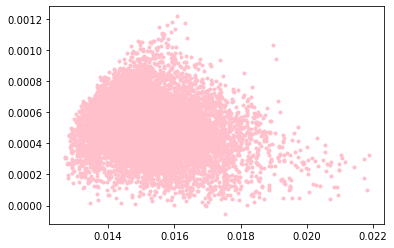

In [9]:
#Make a scatterplot showing the corresponding
#values (x, y) of the overall portfolio standard deviation and overall portfolio mean for each of your portfolio allocation possibilities.

plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'pink') 
plt.show()


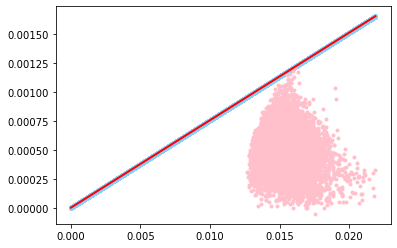

In [10]:
#Add the Capital Market Line to your scatterplot from (I wanted to do so =) )

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(x, y, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'pink')
plt.plot(x, y, '-', linewidth = 2, color = 'red')
plt.show()

In [11]:
#Report the maximum value of Sharpe ratio achieved
#by any of your portfolio allocation possibilities. (This
#is the value of the Sharpe ratio corresponding to the
#vector of asset weights [percentages] you found
#while completing the task in the fifth bullet point
#above.)

print("The maximum value of Sharpe ratio achieved is : ",portfolio_sharpe_ratios[index])
print("with index value as: ",index)

The maximum value of Sharpe ratio achieved is :  0.075763786116202
with index value as:  7885


In [12]:
#Give a complete conceptual description of the
#meaning of the Sharpe ratio as it relates to the
#theory of portfolio optimization. Why do portfolio
#managers seek to maximize this measure?



#The Answer : sharp ratio is defined as the reward over the risk of an invesments . The higher the number the better reward or benefit comes from that 
#investment. When it comes to portfolio optimization , we want to perform a portfolio with the best reward in terms of the existing risk. Hence, 
#sharp ratio can provide that indication for us. 


In [13]:
#******************************************************* BLACK BELT **********************************************************************
#******************************************************* Part 1 and 2 ********************************************************************

In [14]:
capital = 10000 #Pick an appropriate starting capital
#Dollar amounts
print("Allocations in terms of $ amount")
allocations = capital*some_weights
allocations

Allocations in terms of $ amount


,AAPL,MSFT,GOOG,AMZN,NVDA
2012-12-31,5877.460592,39.815024,77.297997,3922.185706,83.240682


In [15]:
#Share amounts per Fund Unit 
print("Number of shares per company")
no_of_shares = allocations / df[[f'Close_{sym}' for sym in some_weights.columns]].loc[some_weights.last_valid_index()].values
no_of_shares

Number of shares per company


,AAPL,MSFT,GOOG,AMZN,NVDA
2012-12-31,309.241219,1.490641,0.219366,15.634336,27.15846


In [16]:
#display your portfolio-fund as a
#single instrument for grader to evaluate. It should
#only have the columns Open and Close; and for an
#index it should have the all the dates

seven_years = df.loc['2012-12-31':] 
seven_years['Open'] = seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0] +seven_years['Open_GOOG']*no_of_shares['GOOG'].iloc[0]+ seven_years['Open_AMZN']*no_of_shares['AMZN'].iloc[0]+ seven_years['Open_NVDA']*no_of_shares['NVDA'].iloc[0]
seven_years['Close'] = seven_years['Close_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+seven_years['Close_GOOG']*no_of_shares['GOOG'].iloc[0]+ seven_years['Close_AMZN']*no_of_shares['AMZN'].iloc[0]+ seven_years['Close_NVDA']*no_of_shares['NVDA'].iloc[0]
bashayer_fund=pd.DataFrame()
bashayer_fund = seven_years[["Open", "Close"]]
bashayer_fund



,Open,Close
Date,,
2012-12-31,9647.340926,10000.000000
2013-01-02,10324.721990,10293.106270
2013-01-03,10279.978424,10234.423867
2013-01-04,10164.480392,10081.783273
2013-01-07,10085.986281,10190.095143
...,...,...
2019-12-24,52202.347514,52099.575595
2019-12-26,52328.374992,53788.962677
2019-12-27,54109.606235,53779.374671


Abslute Return of Our Portofolio:437.18%
CAGR of Our Portofolio: 190.95%
Information Ratio of Our Portofolio:1.18



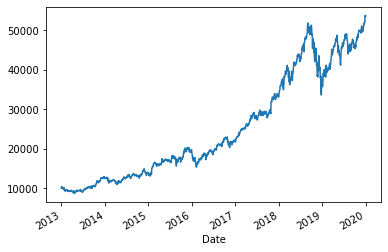

In [17]:
# Print the Absolute Return, Compound Annual Growth
# Rate, and Information Ratio for your fund. 


absolute_return = (seven_years['Close'].iloc[-1]-capital)/capital
CAGR = ((seven_years['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)


s=f"""Abslute Return of Our Portofolio:{absolute_return*100:.2f}%
CAGR of Our Portofolio: {CAGR*100:.2f}%
Information Ratio of Our Portofolio:{information_ratio:.2f}
"""
print(s)
axs = seven_years.Close.plot()

In [18]:
short_time = 6
long_time = 12
bashayer_fund['Close_Short_Rolling'] = bashayer_fund['Close'].rolling(window = short_time).mean() 
bashayer_fund['Close_Long_Rolling'] = bashayer_fund['Close'].rolling(window = long_time).mean() 
bashayer_fund = bashayer_fund.dropna()
bashayer_fund['trade_direction'] = np.sign(bashayer_fund['Close_Short_Rolling'] - bashayer_fund['Close_Long_Rolling'] )
bashayer_fund

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,trade_direction
Date,,,,,
2013-01-16,9893.137806,9994.510957,10028.693963,10095.204345,-1.0
2013-01-17,10082.069119,9982.059660,10012.606156,10093.709317,-1.0
2013-01-18,9941.258515,9976.814102,9986.452622,10067.351636,-1.0
2013-01-22,10019.382071,9998.585621,9963.019353,10047.698449,-1.0
2013-01-23,10053.110940,10073.158251,9973.980109,10046.979698,-1.0
...,...,...,...,...,...
2019-12-24,52202.347514,52099.575595,51847.398861,51165.339959,1.0
2019-12-26,52328.374992,53788.962677,52186.856110,51485.336651,1.0
2019-12-27,54109.606235,53779.374671,52549.414818,51806.887917,1.0


In [19]:
X = bashayer_fund.copy()
y = np.where(X.Close.shift(-1) >= X.Close, 1, -1)  # the actual Y
index = int(0.3*len(X))  
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test) #Predicted Y

pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":logistic.coef_[0]})

,Feature,Coefficients
0,Open,-0.000922
1,Close,0.000320
2,Close_Short_Rolling,0.001210
3,Close_Long_Rolling,-0.000591
4,trade_direction,-0.000021


In [20]:
print(metrics.confusion_matrix(y_test, predictions))

[[ 37 510]
 [ 45 635]]


In [21]:
print("Classification Report")
print(metrics.classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

          -1       0.45      0.07      0.12       547
           1       0.55      0.93      0.70       680

    accuracy                           0.55      1227
   macro avg       0.50      0.50      0.41      1227
weighted avg       0.51      0.55      0.44      1227



In [22]:
results = X_test.copy()
results['window_Diff'] = np.sign(bashayer_fund['Close_Long_Rolling'] - bashayer_fund['Close_Short_Rolling'] )
results['Open_Diff'] = X_test.Open.shift(-1) - X_test.Open 
results['c2c_price'] = X_test.Close.shift(-1) - X_test.Close 
results['Predictions'] = predictions 
results['True_Label'] = y_test  
results['Daily_Return'] = results['c2c_price']*results['Predictions'] 
results['Cumulative_Return'] = results['Daily_Return'].cumsum() 


results.dropna(inplace = True)
results

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,trade_direction,window_Diff,Open_Diff,c2c_price,Predictions,True_Label,Daily_Return,Cumulative_Return
Date,,,,,,,,,,,,
2015-02-18,16046.140347,16121.916167,15963.062691,15629.567503,1.0,-1.0,60.113176,68.203416,1,1,68.203416,68.203416
2015-02-19,16106.253524,16190.119583,16063.379587,15713.750230,1.0,-1.0,91.003545,154.797530,1,1,154.797530,223.000946
2015-02-20,16197.257068,16344.917113,16147.316984,15811.571675,1.0,-1.0,183.481333,213.223414,1,1,213.223414,436.224360
2015-02-23,16380.738402,16558.140527,16239.027349,15919.795646,1.0,-1.0,149.050379,-86.557755,1,-1,-86.557755,349.666604
2015-02-24,16529.788780,16471.582772,16295.753275,16006.099749,1.0,-1.0,-126.864094,-154.909723,1,-1,-154.909723,194.756881
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,51812.287732,52140.518362,51723.402825,51013.260189,1.0,-1.0,390.059781,-40.942768,1,-1,-40.942768,45207.591003
2019-12-24,52202.347514,52099.575595,51847.398861,51165.339959,1.0,-1.0,126.027478,1689.387082,1,1,1689.387082,46896.978085
2019-12-26,52328.374992,53788.962677,52186.856110,51485.336651,1.0,-1.0,1781.231244,-9.588005,1,-1,-9.588005,46887.390080


In [23]:
############################Part Three##########################################3

Abslute Return of Our Algorithmic Trading:435.18%
Abslute Return of Our buy-and-hold Trading :233.52%
CAGR of Our Algorithmic Trading: 190.81%
CAGR of Our buy-and-hold Trading: 12.82%
Information Ratio of Our Algorithmic Trading:1.17
Information Ratio of Our buy-and-hold Trading:1.17



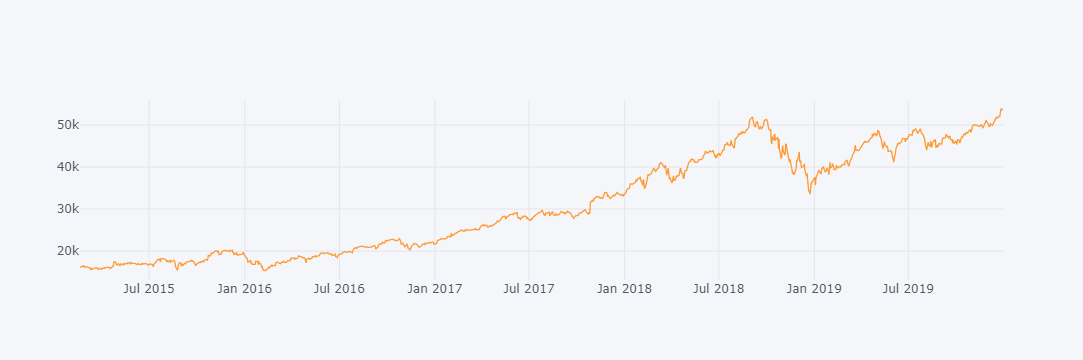

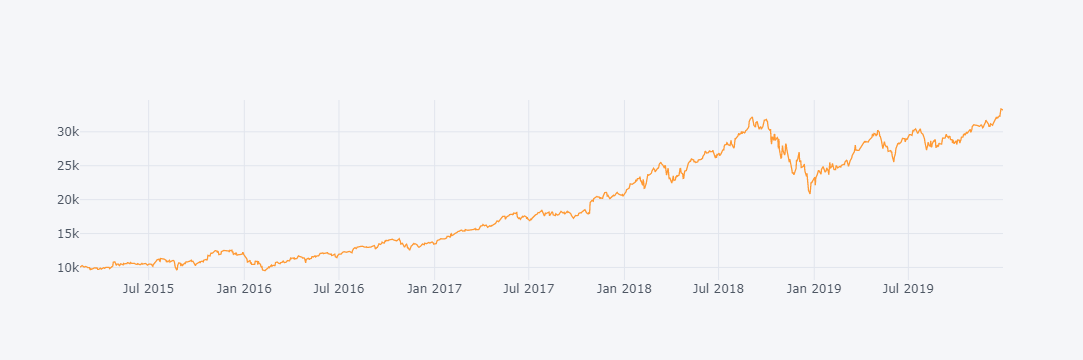

In [24]:
absolute_return_tf = (results['Close'].iloc[-1]-capital)/capital
CAGR_tf = ((results['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_tf = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)

absolute_return_bh = (results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0]
CAGR_bh = ((results.Close.iloc[-1]/results.Open.iloc[0])**(252/len(df)))-1
information_ratio_bh = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)

s=f"""Abslute Return of Our Algorithmic Trading:{absolute_return_tf*100:.2f}%
Abslute Return of Our buy-and-hold Trading :{absolute_return_bh*100:.2f}%
CAGR of Our Algorithmic Trading: {CAGR_tf*100:.2f}%
CAGR of Our buy-and-hold Trading: {CAGR_bh*100:.2f}%
Information Ratio of Our Algorithmic Trading:{information_ratio_tf:.2f}
Information Ratio of Our buy-and-hold Trading:{information_ratio_bh:.2f}
"""

print(s)
results.Close.iplot()

((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot()